# Main Question - How did hosting the Olympics in 2016 affect Brazil?

    * Sub Question: Did hosting the Olympics in 2016 have an affect on crime in Brazil?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing all the functions I created in data_cleaning.py

from data_cleaning import clean_crime_data, clean_homicide_data, clean_drug_data, read_Crime_Index, calc_percent_change

# X-axis to be used on all my plots
x_axis = ["2013", "2014", "2015", "2016", "2017"]

# Crime Index - Brazil

* Data pulled from https://www.numbeo.com/crime/

* Crime Index is determined by this definition:

Crime Index is an estimation of overall level of crime in a given city or a country. We consider crime levels lower than 20 as very low, crime levels between 20 and 40 as being low, crime levels between 40 and 60 as being moderate, crime levels between 60 and 80 as being high and finally crime levels higher than 80 as being very high.


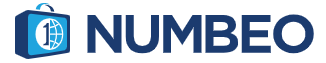

In [4]:
# Read in our CSVs

crime_index_2013 = "Resources/2013 Crime Index.csv"
crime_index_2014 = "Resources/2014 Crime Index.csv"
crime_index_2015 = "Resources/2015 Crime Index.csv"
crime_index_2016 = "Resources/2016 Crime Index.csv"
crime_index_2017 = "Resources/2017 Crime Index.csv"

# Create a file list for iteration
file_list = [crime_index_2013, 
             crime_index_2014, 
             crime_index_2015, 
             crime_index_2016,
             crime_index_2017]

In [5]:
crime_index_df = read_Crime_Index(file_list)
crime_index_df

,Country,Crime Index
Year,,
2013,Brazil,62.62
2014,Brazil,67.00
2015,Brazil,68.95
2016,Brazil,71.23
2017,Brazil,70.62


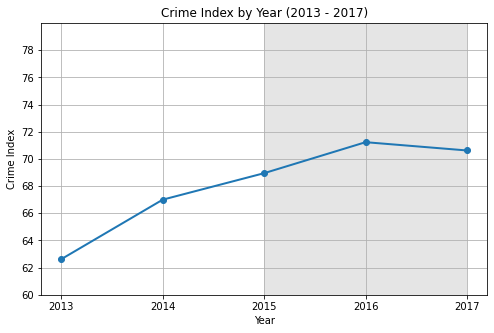

In [6]:
# Plotting out Brazil's Crime Index

plt.figure(figsize=(8, 5))
plt.plot(x_axis, crime_index_df["Crime Index"], marker="o", linewidth=2)
plt.xlabel("Year")
plt.ylabel("Crime Index")
plt.title("Crime Index by Year (2013 - 2017)")
plt.grid()
plt.axvspan(x_axis[2],x_axis[4], facecolor='grey', edgecolor='none', alpha=.2)

plt.ylim(60, 80)
plt.yticks(np.arange(60, 80, step=2))

plt.savefig("Images/Crime Index by Year - Brazil.png")
plt.show()

# Crime Index - Rio

In [7]:
# Reading in our CSV's

crime_index_rio_2013 = "Resources/2013 Rio Crime Index.csv"
crime_index_rio_2014 = "Resources/2014 Rio Crime Index.csv"
crime_index_rio_2015 = "Resources/2015 Rio Crime Index.csv"
crime_index_rio_2016 = "Resources/2016 Rio Crime Index.csv"
crime_index_rio_2017 = "Resources/2017 Rio Crime Index.csv"

# Creating a file list for iteration

file_list_rio = [crime_index_rio_2013, 
             crime_index_rio_2014, 
             crime_index_rio_2015, 
             crime_index_rio_2016,
             crime_index_rio_2017]

In [8]:
crime_index_rio_df = read_Crime_Index(file_list_rio)
crime_index_rio_df

,Country,Crime Index
Year,,
2013,"Rio de Janeiro, Brazil",67.93
2014,"Rio de Janeiro, Brazil",71.97
2015,"Rio de Janeiro, Brazil",72.64
2016,"Rio de Janeiro, Brazil",77.19
2017,"Rio de Janeiro, Brazil",77.87


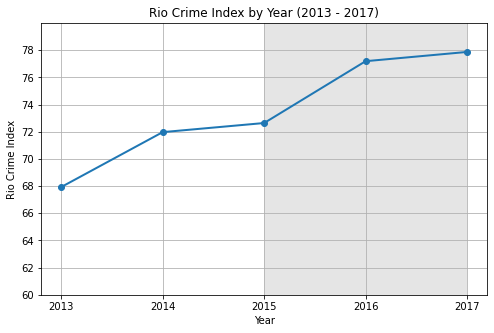

In [9]:
#Plotting out Rio's Crime Index

plt.figure(figsize=(8, 5))
plt.plot(x_axis, crime_index_rio_df["Crime Index"], marker="o", linewidth=2)
plt.xlabel("Year")
plt.ylabel("Rio Crime Index")
plt.title("Rio Crime Index by Year (2013 - 2017)")
plt.grid()
plt.axvspan(x_axis[2],x_axis[4], facecolor='grey', edgecolor='none', alpha=.2)

plt.ylim(60, 80)
plt.yticks(np.arange(60, 80, step=2))

plt.savefig("Images/Rio Crime Index by Year.png")
plt.show()

# Rio compared to Brazil Crime Index

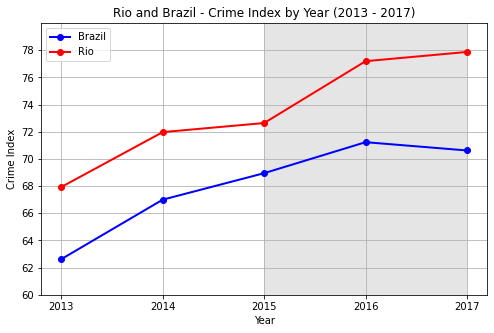

In [10]:
# Putting the 2 previous visualizations together to see how Rio compares to Brazil

plt.figure(figsize=(8, 5))
brazil_crime, = plt.plot(x_axis, crime_index_df["Crime Index"], marker="o", linewidth=2, color="blue", label="Brazil")
rio_crime, = plt.plot(x_axis, crime_index_rio_df["Crime Index"], marker="o", linewidth=2, color="red", label="Rio")
plt.legend(handles=[brazil_crime, rio_crime], loc="best")

plt.xlabel("Year")
plt.ylabel("Crime Index")
plt.title("Rio and Brazil - Crime Index by Year (2013 - 2017)")

plt.ylim(60, 80)
plt.yticks(np.arange(60, 80, step=2))

plt.grid()
plt.axvspan(x_axis[2],x_axis[4], facecolor='grey', edgecolor='none', alpha=.2)

plt.savefig("Images/Rio compared to Brazil - Crime Index.png")
plt.show()

# Data Source:

* https://dataunodc.un.org/

* The source listed on the website:

Source: Data are collected from national authorities through the annual United Nations Crime Trends Survey (UN-CTS).  


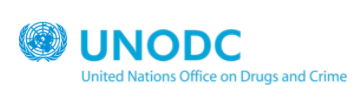

# Violent Crime

* Kidnapping
* Assault
* Robbery
* Homicide

In [11]:
# Reading in our CSV's for Violent Crime

homicide_file = "Resources/homicide_total_rate_and_count.csv"
kidnapping_file = "Resources/kidnapping_0.csv"
robbery_file = "Resources/robbery_0.csv"
seizure_file = "Resources/seizure-table.csv"
assault_file = "Resources/serious_assault_0.csv"

In [12]:
# This is where I call the function I made in data_cleaning.py and pass in the crime and the file

kidnapping_data = clean_crime_data("Kidnapping", kidnapping_file)
robbery_data = clean_crime_data("Robbery", robbery_file)
assault_data = clean_crime_data("Assault", assault_file)
homicide_data = clean_homicide_data("Homicide", homicide_file)

In [13]:
# Merging the data all into 1 dataframe

merged_data = kidnapping_data.merge(robbery_data, how='outer', on = 'Year')
merged_thrice = merged_data.merge(assault_data, how='outer', on = 'Year')
merged_fourth = merged_thrice.merge(homicide_data, how='outer', on = 'Year')

In [14]:
merged_fourth

,Kidnapping Count,Kidnapping Rate,Robbery Count,Robbery Rate,Assault Count,Assault Rate,Homicide Count,Homicide Rate
Year,,,,,,,,
2013,396,0.197,1012504,503.643,661494,329.04,54163.0,26.941954
2014,413,0.204,1282371,632.445,606252,298.99,58497.0,28.849832
2015,473,0.231,1550614,758.350,621009,303.71,58459.0,28.590256
2016,753,0.365,1590325,771.392,600920,291.48,61597.0,29.877807
2017,524,0.252,1657131,797.334,591881,284.79,64078.0,30.831363


# Plotting Violent Crime Counts 

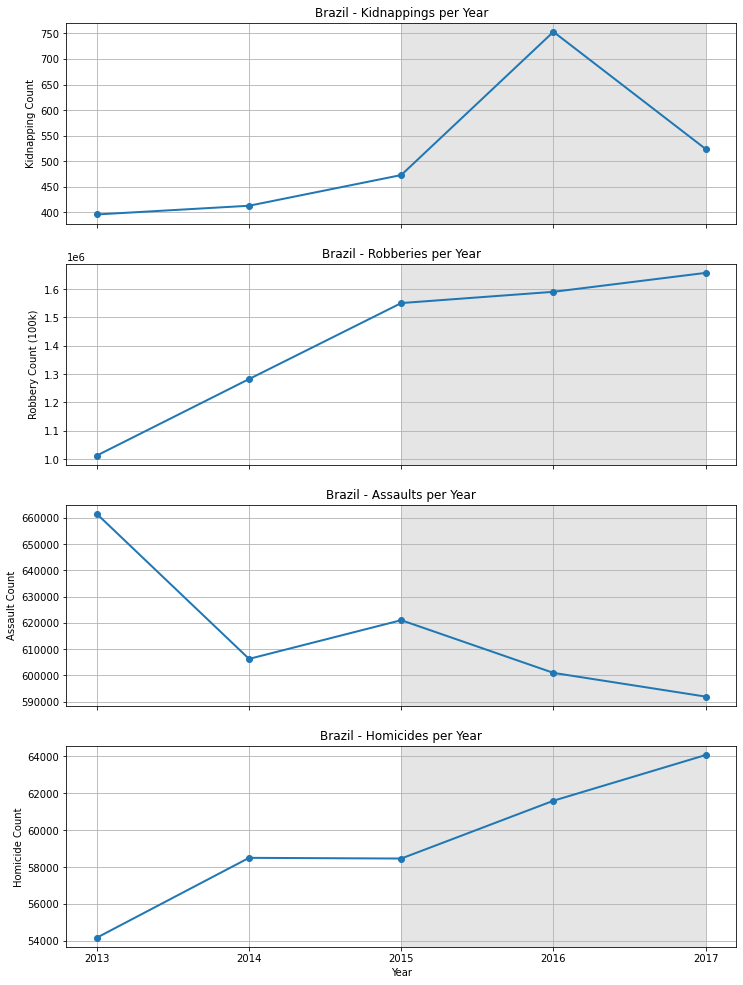

In [15]:
# Creating a figure that has 4 subplots to plot my violent crime data
# The figure will share the same x values being the years

fig, axs = plt.subplots(4, sharex=True, sharey=False, figsize=(12, 17))

axs[0].set_title("Brazil - Kidnappings per Year")
axs[0].plot(x_axis, merged_fourth["Kidnapping Count"], marker="o", linewidth=2)
axs[0].set_ylabel("Kidnapping Count")
axs[0].grid()
axs[0].axvspan(x_axis[2],x_axis[4], facecolor='grey', edgecolor='none', alpha=.2)

axs[1].set_title("Brazil - Robberies per Year")
axs[1].plot(x_axis, merged_fourth["Robbery Count"], marker="o", linewidth=2)
axs[1].set_ylabel("Robbery Count (100k)")
axs[1].grid()
axs[1].axvspan(x_axis[2],x_axis[4], facecolor='grey', edgecolor='none', alpha=.2)

axs[2].set_title("Brazil - Assaults per Year")
axs[2].plot(x_axis, merged_fourth["Assault Count"], marker="o", linewidth=2)
axs[2].set_ylabel("Assault Count")
axs[2].grid()
axs[2].axvspan(x_axis[2],x_axis[4], facecolor='grey', edgecolor='none', alpha=.2)

axs[3].set_title("Brazil - Homicides per Year")
axs[3].plot(x_axis, merged_fourth["Homicide Count"], marker="o", linewidth=2)
axs[3].set_ylabel("Homicide Count")
axs[3].set_xlabel("Year")
axs[3].grid()
axs[3].axvspan(x_axis[2],x_axis[4], facecolor='grey', edgecolor='none', alpha=.2)


plt.savefig("Images/Violent_Crimes_All_Together.png")
plt.show()

# Plotting Violent Crime Rates

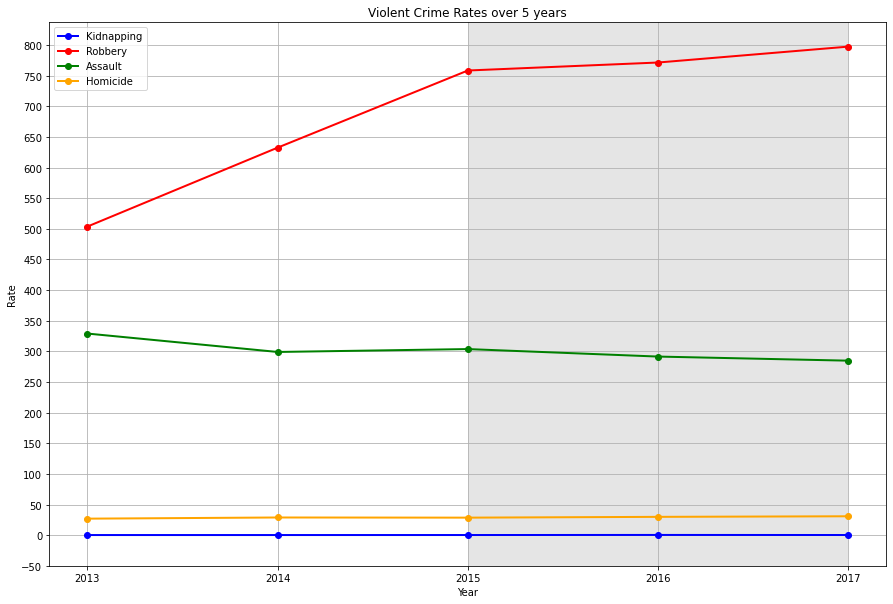

In [16]:
# Plotting all of our Violent Crime Rates on one figure.

plt.figure(figsize=(15, 10))
kidnapping_rate, = plt.plot(x_axis, merged_fourth["Kidnapping Rate"], marker="o", linewidth=2, color="blue", label="Kidnapping")
robbery_rate, = plt.plot(x_axis, merged_fourth["Robbery Rate"], marker="o", linewidth=2, color="red", label="Robbery")
assault_rate, = plt.plot(x_axis, merged_fourth["Assault Rate"], marker="o", linewidth=2, color="green", label="Assault")
homicide_rate, = plt.plot(x_axis, merged_fourth["Homicide Rate"], marker="o", linewidth=2, color="orange", label="Homicide")
plt.legend(handles=[kidnapping_rate, robbery_rate, assault_rate, homicide_rate], loc="best")
plt.grid()
plt.xlabel("Year")
plt.ylabel("Rate")
plt.title("Violent Crime Rates over 5 years")
plt.yticks(np.arange(-50, 850, step=50))

plt.axvspan(x_axis[2],x_axis[4], facecolor='grey', edgecolor='none', alpha=.2)

plt.savefig("Images/Violent_Crimes_Rates.png")
plt.show()

# Analysis

* Percent Change from 2015 to 2016, and 2016 to 2017
    * Brazil Crime Rate
    * Rio Crime Rate
    * Kidnappings
    * Robberies
    * Assaults
    * Homicides

In [17]:
# used a function I created in data_cleaning.py, calculates the percent change from year to year.

brazil_crime_percent_change_2015 = calc_percent_change("2015", crime_index_df, "Crime Index")
brazil_crime_percent_change_2016 = calc_percent_change("2016", crime_index_df, "Crime Index")

rio_crime_percent_change_2015 = calc_percent_change("2015", crime_index_rio_df, "Crime Index")
rio_crime_percent_change_2016 = calc_percent_change("2016", crime_index_rio_df, "Crime Index")

kidnapping_percent_change_2015 = calc_percent_change("2015", kidnapping_data, "Kidnapping Count")
kidnapping_percent_change_2016 = calc_percent_change("2016", kidnapping_data, "Kidnapping Count")

robbery_percent_change_2015 = calc_percent_change("2015", robbery_data, "Robbery Count")
robbery_percent_change_2016 = calc_percent_change("2016", robbery_data, "Robbery Count")

assault_percent_change_2015 = calc_percent_change("2015", assault_data, "Assault Count")
assault_percent_change_2016 = calc_percent_change("2016", assault_data, "Assault Count")

homicide_percent_change_2015 = calc_percent_change("2015", homicide_data, "Homicide Count")
homicide_percent_change_2016 = calc_percent_change("2016", homicide_data, "Homicide Count")


In [18]:
# Created a new dataframe with the data I just calculated.

percent_change_df = pd.DataFrame({"Crime": ["Brazil Crime Index", "Rio Crime Index", "Kidnapping", "Robbery", "Assault", "Homicide"],
                                  "2015 - 2016 % Change": [brazil_crime_percent_change_2015,
                                                  rio_crime_percent_change_2015,
                                                  kidnapping_percent_change_2015,
                                                  robbery_percent_change_2015,
                                                  assault_percent_change_2015,
                                                  homicide_percent_change_2015],
                                 "2016 - 2017 % Change": [brazil_crime_percent_change_2016,
                                                  rio_crime_percent_change_2016,
                                                  kidnapping_percent_change_2016,
                                                  robbery_percent_change_2016,
                                                  assault_percent_change_2016,
                                                  homicide_percent_change_2016]})
percent_change_df = percent_change_df.set_index("Crime")
percent_change_df

,2015 - 2016 % Change,2016 - 2017 % Change
Crime,,
Brazil Crime Index,3.31,-0.86
Rio Crime Index,6.26,0.88
Kidnapping,59.20,-30.41
Robbery,2.56,4.20
Assault,-3.23,-1.50
Homicide,5.37,4.03


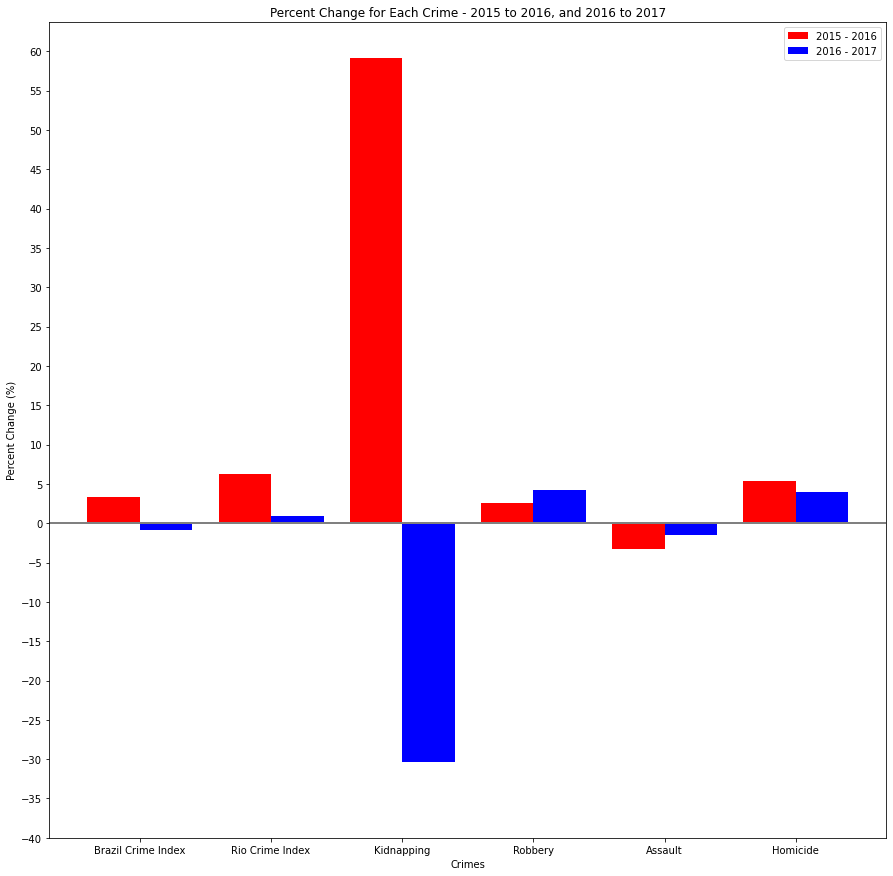

In [72]:
# Plotting this dataframe to visualize the percent changge of each category.

index_list = percent_change_df.index.tolist()

bar_x_axis = np.arange(len(index_list))

fig = plt.figure(figsize=(15,15))
ax = plt.subplot()

change_2015 = ax.bar(bar_x_axis - .2, percent_change_df["2015 - 2016 % Change"], width=.4, color='r', label = "2015 - 2016")
change_2016 = ax.bar(bar_x_axis + .2, percent_change_df["2016 - 2017 % Change"], width=.4, color='b', label = "2016 - 2017")


ax.set_xticks(bar_x_axis)
ax.set_xticklabels(index_list)
ax.legend()
ax.set_yticks(np.arange(-40, 65, step=5))
ax.axhline(linewidth=2, color='grey')

ax.set_title("Percent Change for Each Crime - 2015 to 2016, and 2016 to 2017")
ax.set_xlabel("Crimes")
ax.set_ylabel("Percent Change (%)")

plt.savefig("Images/Percent Change.png")
plt.show()

# Conclusions

* Looking at the Crime Index data for Brazil as a whole and Rio specifically, the visualization showed a positive slope for both. This shows that the Crime Index was already increasing from 2013 to 2016 when the Olympics were hosted.


* When looking at Violent Crime counts commited, there was an increase in 3 out of the 4 violent crimes I chose to look at. Kidnapping, Robbery, and Homicides counts all increased over the 5 year period. Kidnappings in particular had a big spike in 2016. While assaults actually decreased over the 5 year time span.


* Now when we take a look at the rate at which these crime occured, which is how many crimes occured per 100k people, Robbery is the only crime with a clear increase in rate. Homicide and Kidnapping rates stayed the same while Assaults showed a decrease. This is interesting because when we look at the amount of occurances and we see how they increase, the rate of these crimes stayed the same due to the increasing population.


* Now, analyzing the percent change from the year before (2015) to 2016 and the year of (2016) to the year after (2017):
    * There was a percent increase in all crimes and index's except Assaults from 2015 to 2016
    * There was a percent increase in Rio's Crime Index, Robberies, and Homicides from 2016 - 2017, but a percent decrease in Brazil's Crime Index, Kidnapping, and Assaults.